In [1]:
from typing import *
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from autoencoder import AutoEncoder

In [2]:
model = AutoEncoder.load("model_v1")
x = model._data

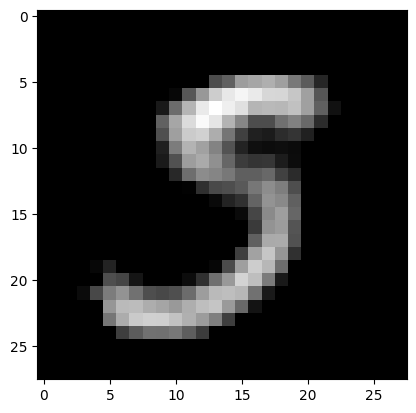

In [3]:

y = model.forward(x)

plt.imshow(y[0], cmap="gray")

In [4]:
model.to_classifier()

/home/eivind/tdt05-mnist/.venv/lib/python3.11/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [6]:
mnist = torchvision.datasets.MNIST(
    root=".", 
    download=True,
    train=True
)

mnist.test_data.shape, mnist.train_data.shape

/home/eivind/tdt05-mnist/.venv/lib/python3.11/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/eivind/tdt05-mnist/.venv/lib/python3.11/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


(torch.Size([60000, 28, 28]), torch.Size([60000, 28, 28]))

(<matplotlib.image.AxesImage at 0x7fede1bcd810>, tensor(7))

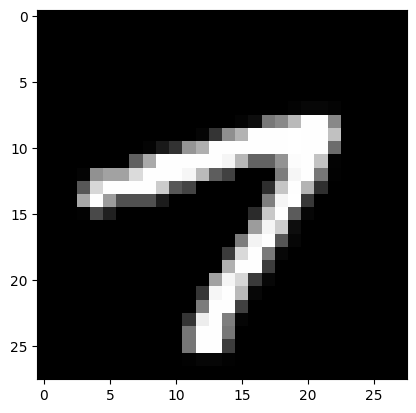

In [12]:
plt.imshow(mnist.data[101], cmap="gray"), mnist.targets[101]